Źródło: https://www.springboard.com/blog/data-mining-python-tutorial/

Źródło danych: https://github.com/barneygovan/from-data-with-love

# Klasteryzacja danych

Jedną z metod statystycznej analizy danych jest klasteryzacja.
Naszym celem jest stworzenie naturalnego grupowania obiektów danych,
które może nie być widoczne na pierwszy rzut oka.

W tym ćwiczeniu analizie poddamy dane dotyczące erupcji gejzeru Old Faithful w Parku Yellowstone.
Dane zawierają tylko dwa atrybuty:
- czas oczekiwania pomiędzy erupcjami (minuty)
- długość erupcji (minuty).

Na tej podstawie stworzymy prosty model klasteryzacji k-means.

Poza modułami pandas, numpy i matplotlib skorzystamy także z modułu **Sci-kit Learn**.
W tym module zawarty jest zbiór narzędzi do uczenia maszynowego i data mining.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster

faithful = pd.read_csv("faithful.csv")
faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


Powyżej widzimy kilka pierwszych wierszy z naszego zbioru danych.
Ponieważ dane są *czyste*, tzn. nie ma w nich brakujących lub pustych wartości, możemy od razu przejść do analizy.

Zacznijmy od wyświetlenia wykresu punktowego danych, by lepiej je poznać i zrozumieć.

Text(0, 0.5, 'Time between eruptions (minutes)')

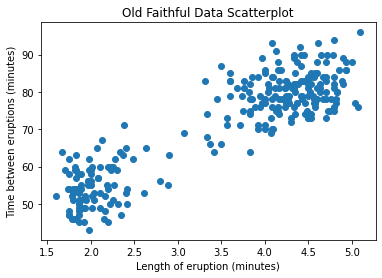

In [2]:
faithful.columns = ['eruptions', 'waiting']

plt.scatter(faithful.eruptions, faithful.waiting)
plt.title('Old Faithful Data Scatterplot')
plt.xlabel('Length of eruption (minutes)')
plt.ylabel('Time between eruptions (minutes)')

Jak widać na wykresie mamy dwa zgrupowania danych.
Teraz zajmiemy się rozróżnieniem poszczególnych grup.

Najpierw wczytujemy dane jako tablicę numpy, żeby móc pracować ze sci-kit.

In [3]:
faith = np.array(faithful)

Teraz używamy algorytmu klasteryzacji k-means.
Ustalamy parametr **k = 2**, ponieważ mamy dwie grupy.

In [4]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(faith)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Jak już dokonaliśmy klasteryzacji danych, możemy spróbować przedstawić ją w formie wizualnej na wykresie.

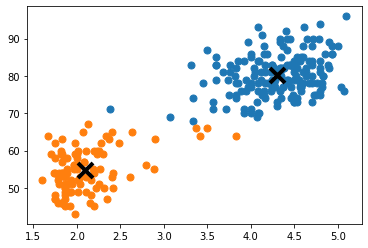

In [5]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = faith[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o', markersize=7)
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=4.0)
plt.show()